# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Brittany Dowdle

### **[Clickable link to GitHub Repo](https://github.com/Bdowdle4/bd-article-summarizer)**

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

***

### Packages Required

In [64]:
import json
import pickle

import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from collections import Counter
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

from wordcloud import WordCloud

print('All prereqs installed.')

All prereqs installed.


***
### Question 1

Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [65]:
import requests
import pickle

# URL of the archived article
url = "https://www.gooverseas.com/blog/should-you-move-abroad"

try:
    # Fetch the HTML content
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for HTTP errors
    html_content = response.text

    # Save the HTML content to a .pkl file
    with open("article.pkl", "wb") as file:
        pickle.dump(html_content, file)

    print("HTML content saved to 'article.pkl'.")

    # (Optional) Save the content to a .html file for easier viewing
    with open("article.html", "w", encoding="utf-8") as html_file:
        html_file.write(html_content)

    print("HTML content also saved to 'article.html'.")
except Exception as e:
    print(f"An error occurred: {e}")

HTML content saved to 'article.pkl'.
HTML content also saved to 'article.html'.


### Question 2

Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [66]:
# Separate text of main article only to analyze
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text()  # Extract the text from the main article container
        print(article_text)
    else:
        print("Main article content not found.")

except Exception as e:
    print(f"An error occurred: {e}")



If you’ve asked yourself recently, "Should I move to another country?", you’re part of a growing group of curious people. Packing up and relocating to another country is a big decision and one that’s best considered thoughtfully. 
Before you make the leap, answer the following questions to test your readiness!

1. Why are you considering a move abroad?
This may seem like an obvious question, but being honest with yourself about why you're thinking about moving overseas is the most important first step in this potential journey. If you want to relocate for a job opportunity, a degree, or simply to find a place that better matches your ideals in life, then you’re on the right track. Having a clear goal will help you know what you’re working towards.
If moving abroad is an escape – from family, unhappiness, or life in general – you will find that your problems always have a way of catching back up with you. Leaving your home country behind may seem like a solution to forget your trouble

In [67]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)
        polarity = doc._.blob.polarity  # Get polarity score
        num_sentences = len(list(doc.sents))  # Count sentences

        # Print results
        print(f"Polarity Score: {polarity}")
        print(f"Number of Sentences: {num_sentences}")
    else:
        print("Main article content not found.")

except Exception as e:
    print(f"An error occurred: {e}")

Polarity Score: 0.16715371336866652
Number of Sentences: 118


### Question 3

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [68]:
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import spacy

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Load spaCy model
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(article_text.lower())  # Convert to lowercase for uniform tokenization

        # Count token frequencies, excluding stop words and punctuation
        token_counts = Counter(token.text for token in doc if not token.is_stop and not token.is_punct)

        # Get the 5 most common tokens
        most_common_tokens = token_counts.most_common(5)

        # Print results
        print("Most Frequent Tokens and Their Frequencies:")
        for token, freq in most_common_tokens:
            print(f"Token: {token}, Frequency: {freq}")
    else:
        print("Main article content not found.")

except Exception as e:
    print(f"An error occurred: {e}")

Most Frequent Tokens and Their Frequencies:
Token: abroad, Frequency: 30
Token: country, Frequency: 20
Token: countries, Frequency: 15
Token: time, Frequency: 11
Token: want, Frequency: 10


### Question 4

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [69]:
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import spacy

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Load spaCy model
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(article_text.lower())  # Convert to lowercase for uniform tokenization

        # Count lemma frequencies, excluding stop words and punctuation
        lemma_counts = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct)

        # Get the 5 most common lemmas
        most_common_lemmas = lemma_counts.most_common(5)

        # Print results
        print("Most Frequent Lemmas and Their Frequencies:")
        for lemma, freq in most_common_lemmas:
            print(f"Lemma: {lemma}, Frequency: {freq}")
    else:
        print("Main article content not found.")

except Exception as e:
    print(f"An error occurred: {e}")

Most Frequent Lemmas and Their Frequencies:
Lemma: country, Frequency: 35
Lemma: abroad, Frequency: 30
Lemma: live, Frequency: 19
Lemma: visa, Frequency: 15
Lemma: work, Frequency: 13


### Question 5

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

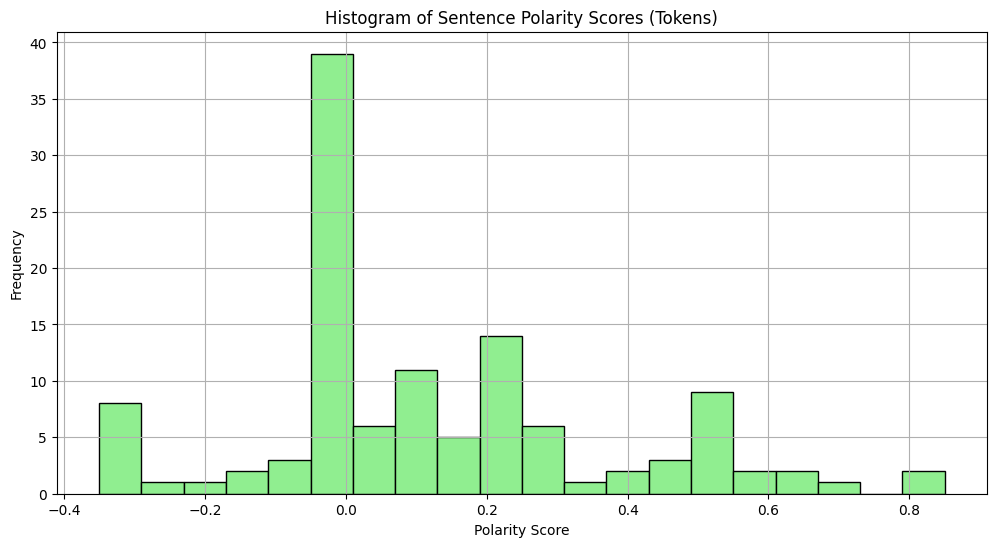

[0.0, -0.1, 0.4666666666666666, 0.0, 0.2916666666666667, 0.2619047619047619, 0.09999999999999999, 0.21666666666666667, -0.3, 0.16666666666666666, 0.0, 0.5, 0.0, 0.5, 0.5, 0.1, -0.2916666666666667, 0.1111111111111111, 0.15803571428571428, 0.0, 0.55, 0.225, -0.125, 0.0, 0.5, 0.04464285714285714, 0.0, 0.06818181818181818, 0.21875, 0.10227272727272727, 0.225, 0.65, 0.0, 0.8, -0.2333333333333333, 0.39999999999999997, 0.0, 0.0, -0.21590909090909094, 0.85, -0.3333333333333333, 0.0, 0.0, 0.0, 0.0, -0.08333333333333333, 0.0, 0.1, 0.5, 0.2, 0.04545454545454545, 0.29166666666666663, 0.5499999999999999, 0.08, 0.5625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22499999999999998, 0.13333333333333333, 0.0, 0.0, 0.0, 0.2125, 0.2, 0.3181818181818182, -0.038131313131313134, 0.2, 0.25, 0.1, 0.49523809523809526, 0.0, 0.16666666666666669, 0.0, -0.125, 1.3877787807814457e-17, 0.0, 0.26666666666666666, 0.7, 0.6499999999999999, 0.25, 0.2, 0.4166666666666667, 0.11212121212121212, 0.3, -0.3, 0.0, 0.025, 0.0, 0.06818181818

In [70]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)
        
        # Create a list of polarity scores for each sentence
        polarity_scores = [sentence._.blob.polarity for sentence in doc.sents]

        # Plot histogram of polarity scores
        plt.figure(figsize=(12, 6))
        plt.hist(polarity_scores, bins=20, color='lightgreen', edgecolor='black')
        plt.title('Histogram of Sentence Polarity Scores (Tokens)')
        plt.xlabel('Polarity Score')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

        # Print the scores
        print(polarity_scores)

except Exception as e:
    print(f"An error occurred: {e}")

# The most common range of scores typically falls within the neutral range (just under 0).
# Sentences with a polarity score near 0 often indicate neutral or balanced sentiments.

### Question 6

Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

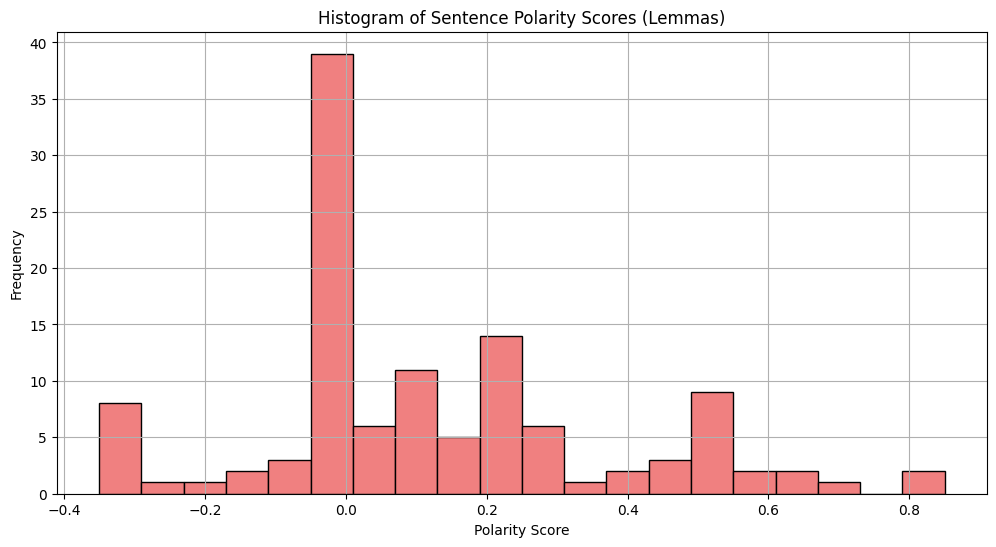

[0.0, -0.1, 0.4666666666666666, 0.0, 0.2916666666666667, 0.2619047619047619, 0.09999999999999999, 0.21666666666666667, -0.3, 0.16666666666666666, 0.0, 0.5, 0.0, 0.5, 0.5, 0.1, -0.2916666666666667, 0.1111111111111111, 0.15803571428571428, 0.0, 0.55, 0.225, -0.125, 0.0, 0.5, 0.04464285714285714, 0.0, 0.06818181818181818, 0.21875, 0.10227272727272727, 0.225, 0.65, 0.0, 0.8, -0.2333333333333333, 0.39999999999999997, 0.0, 0.0, -0.21590909090909094, 0.85, -0.3333333333333333, 0.0, 0.0, 0.0, 0.0, -0.08333333333333333, 0.0, 0.1, 0.5, 0.2, 0.04545454545454545, 0.29166666666666663, 0.5499999999999999, 0.08, 0.5625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22499999999999998, 0.13333333333333333, 0.0, 0.0, 0.0, 0.2125, 0.2, 0.3181818181818182, -0.038131313131313134, 0.2, 0.25, 0.1, 0.49523809523809526, 0.0, 0.16666666666666669, 0.0, -0.125, 1.3877787807814457e-17, 0.0, 0.26666666666666666, 0.7, 0.6499999999999999, 0.25, 0.2, 0.4166666666666667, 0.11212121212121212, 0.3, -0.3, 0.0, 0.025, 0.0, 0.06818181818

In [71]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)

        # Create a list of polarity scores for each lemmatized sentence
        polarity_scores = [sentence._.blob.polarity for sentence in doc.sents]

        # Plot histogram of polarity scores
        plt.figure(figsize=(12, 6))
        plt.hist(polarity_scores, bins=20, color='lightcoral', edgecolor='black')
        plt.title('Histogram of Sentence Polarity Scores (Lemmas)')
        plt.xlabel('Polarity Score')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

        # Print the scores if needed
        print(polarity_scores)

except Exception as e:
    print(f"An error occurred: {e}")

# This histogram is practically identical to the tokens.
# There is a slightly positive skew for both.

### Question 7

Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell
* Initial guess based off of histograms
* Cutoff Score (tokens): **0.1**
* Cutoff Score (lemmas): **0.1**

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).
* Scores decided from binary search approach
* Cutoff Score (tokens): **0.50**
* Cutoff Score (lemmas): **0.48**

### Question 8

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [72]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)

        # Define cutoff score
        cutoff_score = 0.1

        # Generate a summary
        sentence_list = [
            sent.text.strip() for sent in doc.sents if sent._.blob.polarity > cutoff_score
        ]
        summary = ' '.join(sentence_list)

        # Print the summary
        print("Summary of the article:")
        print(summary)

except Exception as e:
    print(f"An error occurred: {e}")

Summary of the article:
Packing up and relocating to another country is a big decision and one that’s best considered thoughtfully. Why are you considering a move abroad?This may seem like an obvious question, but being honest with yourself about why you're thinking about moving overseas is the most important first step in this potential journey. If you want to relocate for a job opportunity, a degree, or simply to find a place that better matches your ideals in life, then you’re on the right track. If moving abroad is an escape – from family, unhappiness, or life in general – you will find that your problems always have a way of catching back up with you. Addressing your main issues ahead of a move will allow you to fully immerse yourself in the experience without all of the baggage.2. Do you want better weather? More access to outdoor activities? More affordable education?Or maybe you’ve already visited a country and fallen in love with it. Many countries have immigration laws that m

### Question 9

Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [73]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)

        # Define cutoff score
        cutoff_score = 0.1

        # Generate a summary
        sentence_list = [
            sent.text.strip() for sent in doc.sents if sent._.blob.polarity > cutoff_score
        ]
        summary = ' '.join(sentence_list)

        # Analyze the summary
        summary_doc = nlp(summary)
        summary_polarity = summary_doc._.blob.polarity  # Calculate polarity score
        summary_sentences_count = len(list(summary_doc.sents))  # Count sentences

        # Print results
        print("Polarity Score of the Summary:", summary_polarity)
        print("Number of Sentences in the Summarized Article:", summary_sentences_count)

except Exception as e:
    print(f"An error occurred: {e}")

Polarity Score of the Summary: 0.31398678341860126
Number of Sentences in the Summarized Article: 51


In [74]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)

        # Find cutoff score for 10 sentences
        cutoff_score = 0.1
        sentence_list = []
        while True:
            sentence_list = [
                sent.text.strip() for sent in doc.sents if sent._.blob.polarity > cutoff_score
            ]
            if len(sentence_list) <= 10:
                break
            cutoff_score += 0.02  # Increment the cutoff score to reduce sentences

        summary = ' '.join(sentence_list)

        # Analyze the summary
        summary_doc = nlp(summary)
        summary_polarity = summary_doc._.blob.polarity  # Calculate polarity score
        summary_sentences_count = len(list(summary_doc.sents))  # Count sentences

        # Print results
        print("Cutoff Score Used:", cutoff_score)
        print("Polarity Score of the Summary (tokens):", summary_polarity)
        print("Number of Sentences in the Summarized Article:", summary_sentences_count)
        print("\nSummary of the article:")
        print(summary)

except Exception as e:
    print(f"An error occurred: {e}")

Cutoff Score Used: 0.5000000000000001
Polarity Score of the Summary (tokens): 0.6449999999999999
Number of Sentences in the Summarized Article: 8

Summary of the article:
Since they prioritize hiring their own citizens, you have to be a highly skilled worker in an in-demand field to get the job. Au pair: If you love kids and are under 30, living and working abroad as anau pairis a great option. While you may have heard of people living abroad on tourist visas doing “border runs” to neighboring countries every 90 days to reset their visa time limits, this isn’t a great long-term solution and is not recommended. Impulsivity can be exhilarating and dropping everything to move to a place you’ve never been to could end up being the greatest thing you’ve ever done. Even if you have a job secured before you go, it’s wise to have a good bit of savings to tide you over until your first paycheck. The more the better, though! Keep in touch with loved ones: Be honest about your feelings and ask fo

### Question 10

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [75]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)

        # Define cutoff score
        cutoff_score = 0.1

        # Generate a summary
        sentence_list = [
            sent.text.strip() for sent in doc.sents
            if nlp(' '.join([token.lemma_ for token in sent]))._.blob.polarity > cutoff_score
        ]
        summary = ' '.join(sentence_list)

        # Print the summary
        print("Summary of the article:")
        print(summary)

except Exception as e:
    print(f"An error occurred: {e}")

Summary of the article:
Packing up and relocating to another country is a big decision and one that’s best considered thoughtfully. Why are you considering a move abroad?This may seem like an obvious question, but being honest with yourself about why you're thinking about moving overseas is the most important first step in this potential journey. If you want to relocate for a job opportunity, a degree, or simply to find a place that better matches your ideals in life, then you’re on the right track. Addressing your main issues ahead of a move will allow you to fully immerse yourself in the experience without all of the baggage.2. More access to outdoor activities? More affordable education?Or maybe you’ve already visited a country and fallen in love with it. Many countries have immigration laws that make it difficult if not nearly impossible to just pack up and relocate. The US currently doesn’t have any special agreements of free movement with other countries so you will always need a

### Question 11

Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [76]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)

        # Define cutoff score
        cutoff_score = 0.1

        # Generate a summary
        sentence_list = [
            sent.text.strip() for sent in doc.sents
            if nlp(' '.join([token.lemma_ for token in sent]))._.blob.polarity > cutoff_score
        ]
        summary = ' '.join(sentence_list)

        # Analyze the
        doc = nlp(article_text) 

        # Define cutoff score
        cutoff_score = 0.1

        # Generate a summary
        sentence_list = [
            sent.text.strip() for sent in doc.sents
            if nlp(' '.join([token.lemma_ for token in sent]))._.blob.polarity > cutoff_score
        ]
        summary = ' '.join(sentence_list)

        # Analyze the summary
        summary_doc = nlp(summary)
        summary_polarity = summary_doc._.blob.polarity  # Calculate polarity score
        summary_sentences_count = len(list(summary_doc.sents))  # Count sentences

        # Print results
        print("Polarity Score of the Summary (Lemma-based):", summary_polarity)
        print("Number of Sentences in the Summarized Article:", summary_sentences_count)

except Exception as e:
    print(f"An error occurred: {e}")

Polarity Score of the Summary (Lemma-based): 0.2975316476452837
Number of Sentences in the Summarized Article: 54


In [77]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)

        # Find cutoff score for 10 sentences
        cutoff_score = 0.1
        sentence_list = []
        while True:
            sentence_list = [
                sent.text.strip() for sent in doc.sents
                if nlp(' '.join([token.lemma_ for token in sent]))._.blob.polarity > cutoff_score
            ]
            if len(sentence_list) <= 12:
                break
            cutoff_score += 0.02  # Increment the cutoff score to reduce sentences

        summary = ' '.join(sentence_list)

        # Analyze the summary
        summary_doc = nlp(summary)
        summary_polarity = summary_doc._.blob.polarity  # Calculate polarity score
        summary_sentences_count = len(list(summary_doc.sents))  # Count sentences

        # Print results
        print("Cutoff Score Used:", cutoff_score)
        print("Polarity Score of the Summary (lemmas):", summary_polarity)
        print("Number of Sentences in the Summarized Article:", summary_sentences_count)
        print("\nSummary of the article:")
        print(summary)

except Exception as e:
    print(f"An error occurred: {e}")

# I could only get 5 and under or 12 and over no matter the combinations I used!

Cutoff Score Used: 0.48000000000000015
Polarity Score of the Summary (lemmas): 0.5787499999999999
Number of Sentences in the Summarized Article: 12

Summary of the article:
More access to outdoor activities? More affordable education?Or maybe you’ve already visited a country and fallen in love with it. Since they prioritize hiring their own citizens, you have to be a highly skilled worker in an in-demand field to get the job. You may also be able to work part-time while studying at alanguage schoolif getting another degree isn’t on your radar. Impulsivity can be exhilarating and dropping everything to move to a place you’ve never been to could end up being the greatest thing you’ve ever done. They’ll be able to go over your options with you to make sure you don’t run into any issues in the future.6. Even if you have a job secured before you go, it’s wise to have a good bit of savings to tide you over until your first paycheck. The more the better, though! Keep in touch with loved ones:

### Question 12

Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

> Initial score (tokens): **0.16715371336866652**
>
> Summary score (tokens): **0.6449999999999999**
>
> Summary score (lemmas): **0.5787499999999999**
>
> The summary polarity is higher than the initial article polarity because negative or neutral sentences (below the cutoff) are excluded.
> This difference arises because the summary deliberately filters for sentimentally positive content, altering the overall tone.
> The original article reflects all perspectives, while the summary focuses on one end of the sentiment spectrum.


### Question 13

Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

> The lemmas summary score would be the best in my opinion. The article came across like it wanted moving abroad to be a good thing, but wanted the reader to understand there are a lot of serious topics to consider when doing so.
>
> Lemmatization reduces words to their base forms, making it less sensitive to variations in tense, number, and word forms. This process provides a clearer, more consistent view of the content's underlying meaning, focusing on the core concepts. It eliminates the noise of inflections, allowing the sentiment to reflect the main message rather than the form in which the words are expressed.

***
Wanted to try a wordcloud after seeing it last week! This one is of the main article text.

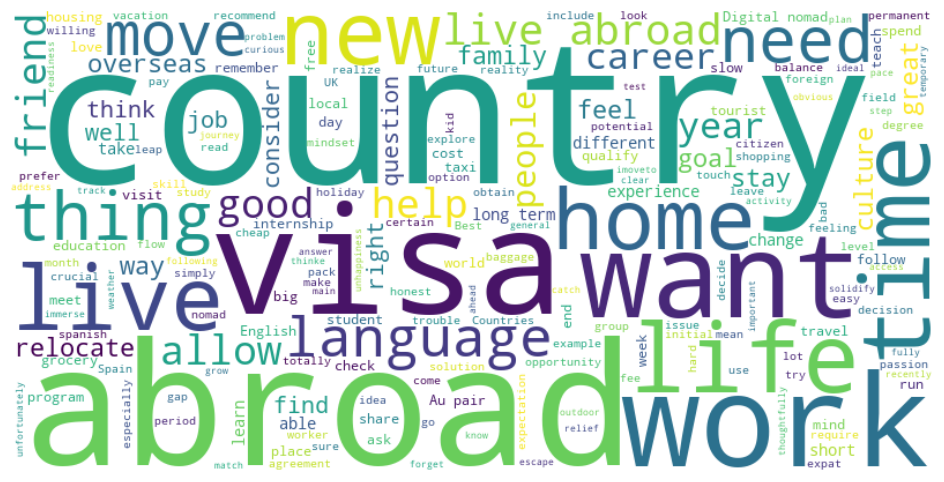

In [78]:
import pickle
from bs4 import BeautifulSoup
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract the main article content
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)

        # Set up spaCy
        nlp = spacy.load("en_core_web_sm")

        # Process the article text
        doc = nlp(article_text)

        # Extract only the lemmatized words to create a word cloud
        lemmatized_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(lemmatized_words))

        # Plot the word cloud
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

This one is from the lemmas summary (with cutoff)

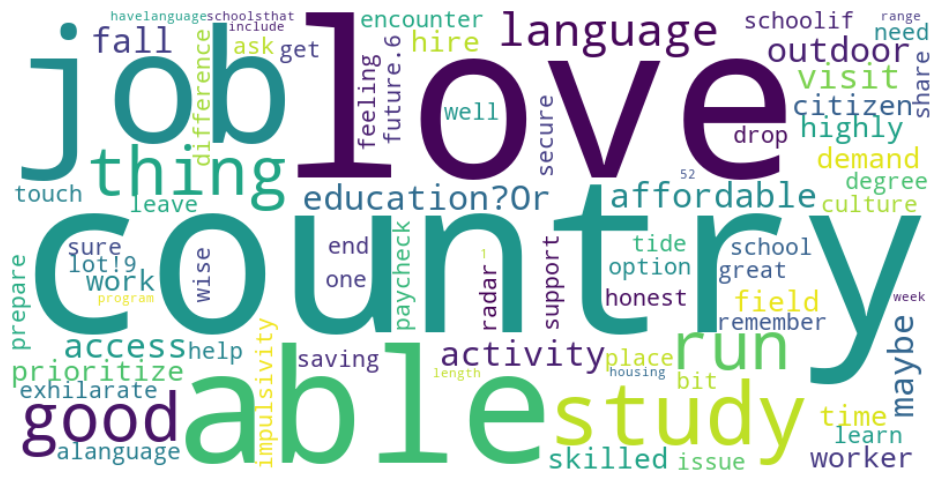

In [79]:
import pickle
from bs4 import BeautifulSoup
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Load the HTML content from the .pkl file
try:
    with open("article.pkl", "rb") as file:
        html_content = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Adjust the selector to match the main content's container
    article_div = soup.find("div", {"class": "layoutArticle__main"})
    if article_div:
        article_text = article_div.get_text(strip=True)  # Extract clean text from the main article container

        # Set up spaCy with SpacyTextBlob
        nlp = spacy.load("en_core_web_sm")
        nlp.add_pipe("spacytextblob")

        # Analyze the text
        doc = nlp(article_text)

        # Find cutoff score for 10 sentences
        cutoff_score = 0.1
        sentence_list = []
        while True:
            sentence_list = [
                sent.text.strip() for sent in doc.sents
                if nlp(' '.join([token.lemma_ for token in sent]))._.blob.polarity > cutoff_score
            ]
            if len(sentence_list) <= 12:
                break
            cutoff_score += 0.02  # Increment the cutoff score to reduce sentences

        summary = ' '.join(sentence_list)

        # Extract lemmatized words from the summary
        summary_doc = nlp(summary)
        lemmatized_words = [token.lemma_ for token in summary_doc if not token.is_stop and not token.is_punct]

        # Get the frequency of the lemmatized words
        word_counts = Counter(lemmatized_words)

        # Generate the word cloud with all words
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

        # Plot the word cloud
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")